In [1]:
!python --version


Python 3.12.7


In [29]:
!pip install missingno 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [7]:
import pandas as pd

my_data = pd.read_csv("../python/data/ChocolateSales.csv")

In [9]:
my_data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [11]:
my_data.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384
1093,Karlen McCaffrey,India,70% Dark Bites,23-May-22,"$5,075",344


In [13]:
my_data.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [23]:
# display basic info
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [21]:
# check missing values
my_data.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

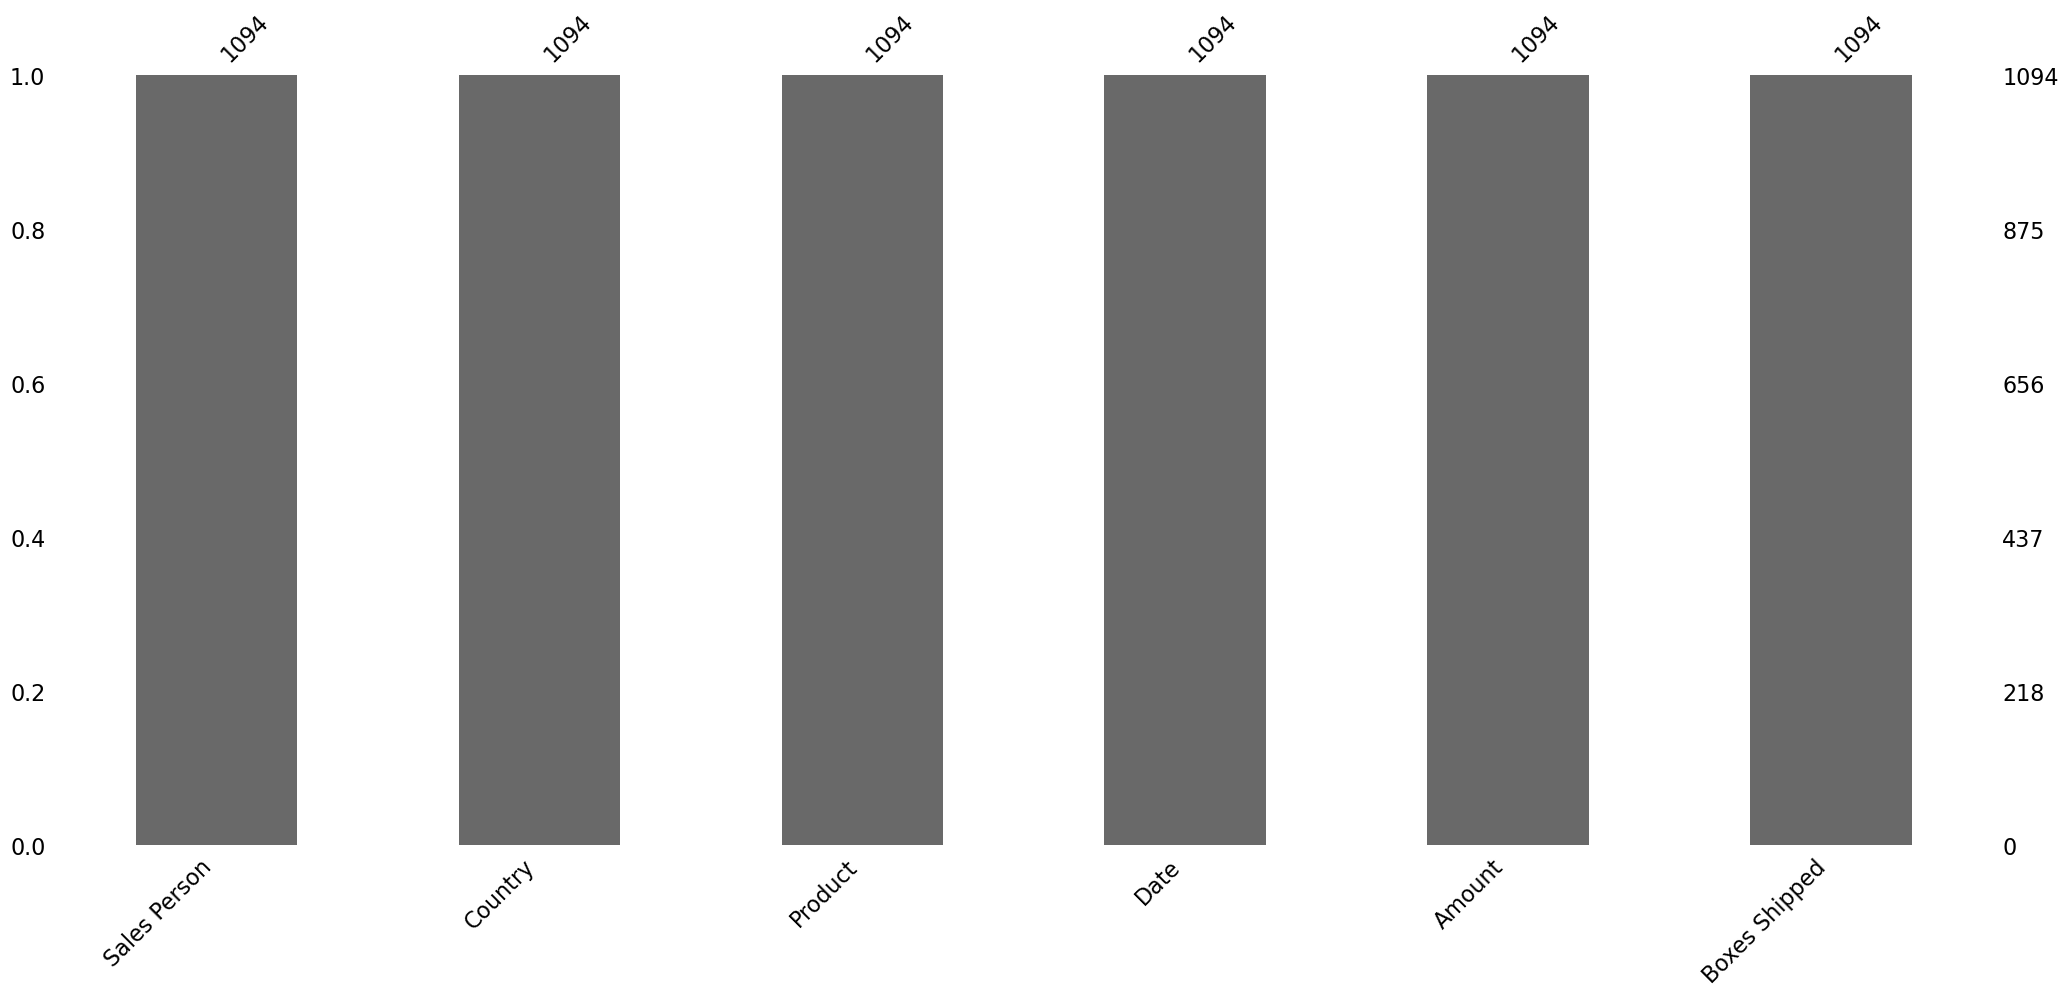

In [37]:
# visualize missign data
msno.bar(my_data)
plt.show()

In [39]:
# summary statistics
my_data.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [47]:
# Check first few values to identify the format
print(my_data["Date"].head())

0   2022-01-04
1   2022-08-01
2   2022-07-07
3   2022-04-27
4   2022-02-24
Name: Date, dtype: datetime64[ns]


In [49]:
# Drop duplicate rows if any
my_data.drop_duplicates(inplace=True)

# Ensure Date is in datetime format
my_data["Date"] = pd.to_datetime(my_data["Date"], format="%Y-%m-%d")


# Convert categorical variables to category type
my_data["Sales Person"] = my_data["Sales Person"].astype("category")
my_data["Country"] = my_data["Country"].astype("category")
my_data["Product"] = my_data["Product"].astype("category")


In [53]:
# Convert Amount and Boxes Shipped to numeric
my_data["Amount"] = pd.to_numeric(my_data["Amount"], errors="coerce")
my_data["Boxes Shipped"] = pd.to_numeric(my_data["Boxes Shipped"], errors="coerce")

# Now perform the division
my_data["Revenue per Box"] = my_data["Amount"] / my_data["Boxes Shipped"]

# Fill NaN values (in case of division by zero)
my_data["Revenue per Box"].fillna(0, inplace=True)

# Check the first few rows
my_data.head()


C:\Users\techw\AppData\Local\Temp\ipykernel_24272\1154622202.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_data["Revenue per Box"].fillna(0, inplace=True)


,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Year,Month,Day,Weekday,Revenue per Box
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,NaN,180,2022,1,4,Tuesday,0.0
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,NaN,94,2022,8,1,Monday,0.0
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,NaN,91,2022,7,7,Thursday,0.0
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,NaN,342,2022,4,27,Wednesday,0.0
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,NaN,184,2022,2,24,Thursday,0.0


In [ ]:
# Distribution of Amount
plt.figure(figsize=(8,5))
sns.histplot(my_data["Amount"], bins=30, kde=True)
plt.title("Distribution of Sales Amount")
plt.show()

# Boxplot for Boxes Shipped
plt.figure(figsize=(6,4))
sns.boxplot(x=my_data["Boxes Shipped"])
plt.title("Boxplot of Boxes Shipped")
plt.show()

# Count plot of Products
plt.figure(figsize=(8,5))
sns.countplot(x="Product", data=my_data, order=my_data["Product"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Sales by Product Type")
plt.show()


In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(my_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Relationship between Boxes Shipped and Sales Amount
sns.scatterplot(x="Boxes Shipped", y="Amount", data=my_data)
plt.title("Boxes Shipped vs Sales Amount")
plt.show()


In [ ]:
# Monthly Sales Trend
my_data_grouped = my_data.groupby("Month")["Amount"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="Month", y="Amount", data=my_data_grouped, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.show()
